In [22]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(42)

In [23]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

[0, 2, 0, 12]

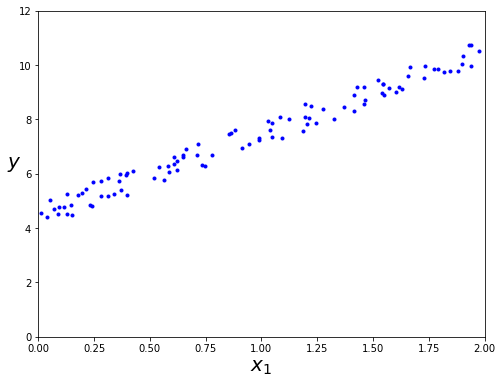

In [30]:
plt.figure(figsize=(8,6))
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$y$", fontsize=20, rotation=0)
plt.axis([0, 2, 0, 12])

In [39]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[ 4.51359766],
       [ 2.98323418]])

In [43]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)

[0, 2, 0, 12]

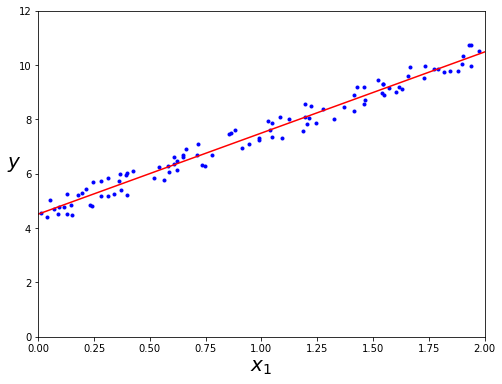

In [44]:
plt.figure(figsize=(8,6))
plt.plot(X, y, 'b.')
plt.plot(X_new, y_predict, "r-")
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$y$", fontsize=20, rotation=0)
plt.axis([0, 2, 0, 12])